# First Piechart Example
This is a work in progress.  I am trying to create a pie chart using matplotlib.

In [8]:
import logging
import matplotlib.pyplot as plt
from collections import Counter
import util.data_loader as data_loader
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive, VBox, HBox, Output, Label, Text

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Some constants
NUM_WEEKS = 4

# # device_type = data_loader.Device["PLUG"]
# device_type = None
# # unique_id = '13E56C4E1FD98745'  # Contact Sensor
# # unique_id = '39C0AE0A9852E5EE'  # Plug
# unique_id = None  # None

# Create a mapping dictionary for privacyState values
change_type_mapping = {
    data_loader.ChangeType["PRIVACY_STATE_HUB"]: 'Hub',
    data_loader.ChangeType["PRIVACY_STATE_PROXY"]: 'Dashboard',
}

# Create a color mapping dictionary for privacyState values
color_mapping = {
    'Hub': '#3c8eae',
    'Dashboard': '#c77838',
}

# Custom function to display the absolute count and percentage
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct


def update_plot(custom_id, **kwargs):
    weeks = [int(key.split('_')[1]) for key, value in kwargs.items() if key.startswith('week_') and value]
    if len(weeks) == 0:
        weeks = list(range(1, NUM_WEEKS + 1))
        
    device_types = [int(key.split('_')[1]) for key, value in kwargs.items() if key.startswith('devicetype_') and value]
    
    # weeks = [key for key, value in kwargs.items() if value]
    logger.info(f'Selected weeks: {weeks}')
    logger.info(f'Selected device types: {device_types}')
    
    data = data_loader.load_data(
        weeks=weeks,
        device_types=device_types,
        unique_id=custom_id,
        change_types=[data_loader.ChangeType["PRIVACY_STATE_HUB"], data_loader.ChangeType["PRIVACY_STATE_PROXY"]]
    )
    
    logger.info(f'Loaded {len(data)} records')
    
    # Extract privacyState values
    change_types = [change_type_mapping[item['changeType']] for item in data]
    
    # Count occurrences of each privacyState
    privacy_state_counts = Counter(change_types)
    
    # Prepare data for pie chart
    labels = privacy_state_counts.keys()
    sizes = privacy_state_counts.values()
    
    # Get the corresponding colors for each label
    colors = [color_mapping[label] for label in labels]

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors)
    # plt.title(f'Distribution of Change Location in Week 1 - {data_loader.device_name_mapping[device_type]}')
    # plt.title(f'Distribution of Change Location in Week(s) {", ".join(weeks)} - {data_loader.device_name_mapping[device_type]}')
    # plt.title(f'Distribution of Change Location in Week(s) {", ".join(weeks)}')
    # plt.title(f'Distribution of Change Location')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # Add a legend
    plt.legend(loc='lower right', labels=labels)
    
    # plt.savefig('privacy_states_distribution.svg', format='svg')
    plt.show()
    

# Create checkboxes for selected weeks
week_numbers = np.arange(1, NUM_WEEKS + 1)
weeks_checkboxes = {f'week_{str(week)}': widgets.Checkbox(description=str(week), value=True) for week in week_numbers}

# Create checkboxes for device types
device_ids = list(data_loader.Device.values())
devices = [data_loader.device_name_mapping[x] for x in list(data_loader.Device.values())]
device_type_checkboxes = {f'devicetype_{str(device_id)}': widgets.Checkbox(description=data_loader.device_name_mapping[device_id], value=True) for device_id in device_ids}

# Create text input for custom ID
custom_id_widget = Text(description='Custom ID:')

# Create an interactive output
interactive_plot = interactive(update_plot, custom_id=custom_id_widget, **weeks_checkboxes, **device_type_checkboxes)
output = interactive_plot.children[-1]
# output.layout.height = '400px'

# Layout for inputs
custom_id_layout = VBox([Label('Enter custom ID (ignores device type when set):'), custom_id_widget])

# Layout for checkboxes
weeks_checkbox_title = Label("Select weeks:")
weeks_checkbox_layout = VBox([weeks_checkbox_title] + [weeks_checkboxes[f'week_{str(week)}'] for week in week_numbers])

device_types_checkbox_title = Label("Select device types:")
device_types_checkbox_layout = VBox([device_types_checkbox_title] + [device_type_checkboxes[f'devicetype_{str(device_id)}'] for device_id in device_ids])

# Display the widgets and the plot
display(custom_id_layout, weeks_checkbox_layout, device_types_checkbox_layout, output)


Output()

INFO:util.data_loader:Loading data for weeks: [1] and device types: None and unique_id: None and change_types: [1, 2]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 1 and device Contact Sensor
INFO:util.data_loader:Loading data for week 1 and device Plug
INFO:util.data_loader:Loaded 1281 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 1281 records remaining
INFO:util.data_loader:Filtered data based on change_types: 173 records remaining
INFO:__main__:Loaded 173 records


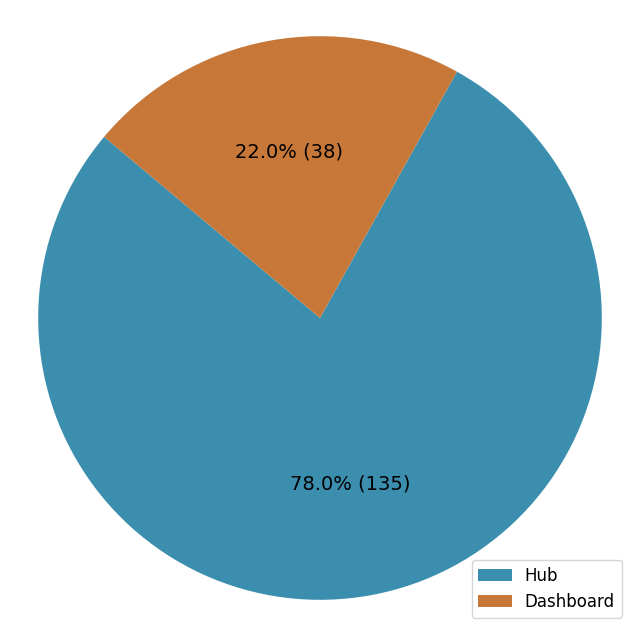

INFO:util.data_loader:Loading data for weeks: [2] and device types: None and unique_id: None and change_types: [1, 2]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 2 and device Contact Sensor
INFO:util.data_loader:Loading data for week 2 and device Plug
INFO:util.data_loader:Loaded 464 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 464 records remaining
INFO:util.data_loader:Filtered data based on change_types: 146 records remaining
INFO:__main__:Loaded 146 records


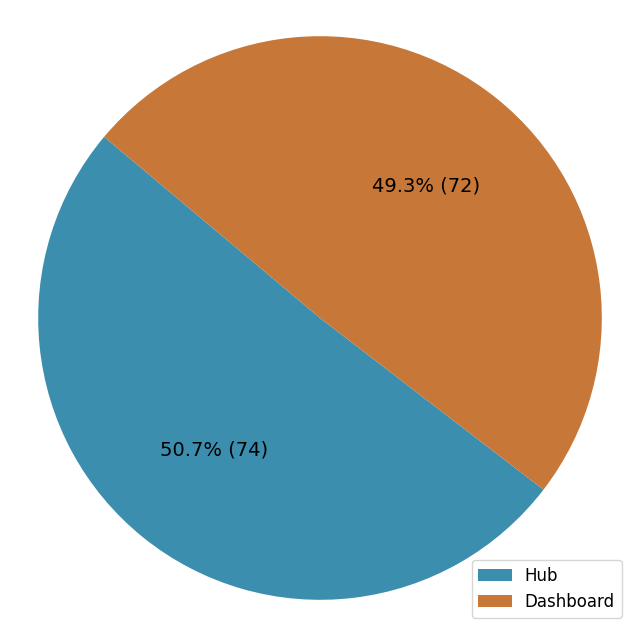

INFO:util.data_loader:Loading data for weeks: [3] and device types: None and unique_id: None and change_types: [1, 2]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 3 and device Contact Sensor
INFO:util.data_loader:Loading data for week 3 and device Plug
INFO:util.data_loader:Loaded 416 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 416 records remaining
INFO:util.data_loader:Filtered data based on change_types: 91 records remaining
INFO:__main__:Loaded 91 records


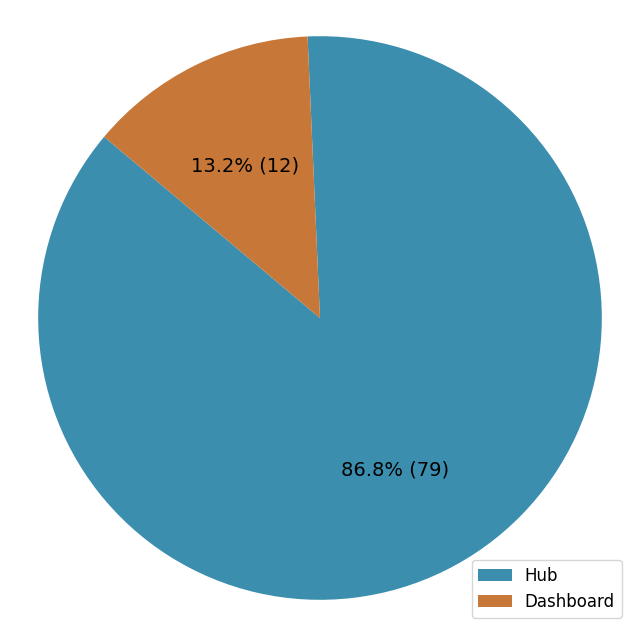

INFO:util.data_loader:Loading data for weeks: [4] and device types: None and unique_id: None and change_types: [1, 2]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 4 and device Contact Sensor
INFO:util.data_loader:Loading data for week 4 and device Plug
INFO:util.data_loader:Loaded 616 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 616 records remaining
INFO:util.data_loader:Filtered data based on change_types: 103 records remaining
INFO:__main__:Loaded 103 records


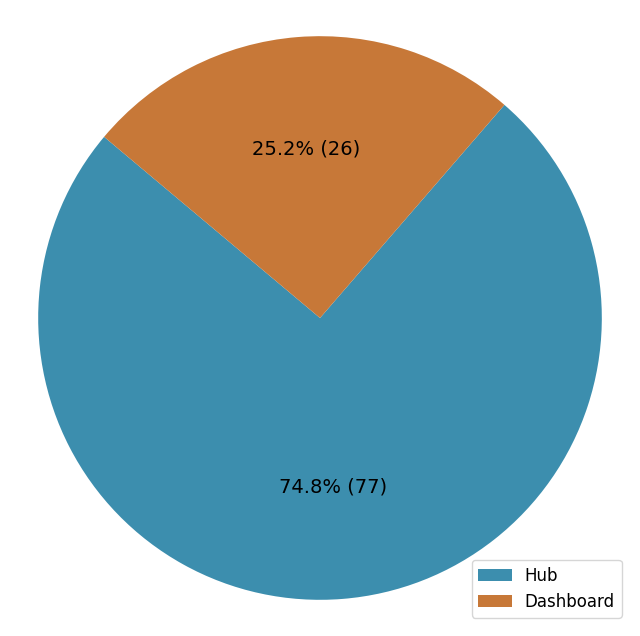

In [15]:
import logging
import matplotlib.pyplot as plt
from collections import Counter
import util.data_loader as data_loader
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive, VBox, HBox, Output, Label, Text

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Some constants
NUM_WEEKS = 4

# # device_type = data_loader.Device["PLUG"]
# device_type = None
# # unique_id = '13E56C4E1FD98745'  # Contact Sensor
# # unique_id = '39C0AE0A9852E5EE'  # Plug
# unique_id = None  # None

# Create a mapping dictionary for privacyState values
change_type_mapping = {
    data_loader.ChangeType["PRIVACY_STATE_HUB"]: 'Hub',
    data_loader.ChangeType["PRIVACY_STATE_PROXY"]: 'Dashboard',
}

# Create a color mapping dictionary for privacyState values
color_mapping = {
    'Hub': '#3c8eae',
    'Dashboard': '#c77838',
}

# Custom function to display the absolute count and percentage
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct

for week in range(1, NUM_WEEKS + 1):
    data = data_loader.load_data(
        weeks=[week],
        device_types=None,
        unique_id=None,
        change_types=[data_loader.ChangeType["PRIVACY_STATE_HUB"], data_loader.ChangeType["PRIVACY_STATE_PROXY"]]
    )
    
    logger.info(f'Loaded {len(data)} records')
    
    # Extract privacyState values
    change_types = [change_type_mapping[item['changeType']] for item in data]
    
    # Count occurrences of each privacyState
    privacy_state_counts = Counter(change_types)
    
    # Prepare data for pie chart
    labels = privacy_state_counts.keys()
    sizes = privacy_state_counts.values()
    
    # Get the corresponding colors for each label
    colors = [color_mapping[label] for label in labels]

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 14})
    # plt.title(f'Distribution of Change Location in Week {week}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # Add a legend
    plt.legend(loc='lower right', labels=labels, fontsize='12')
    
    plt.savefig(f'output/state_change_location_week_{week}.pdf', format='pdf')
    plt.show()

INFO:util.data_loader:Loading data for weeks: [1] and device types: None and unique_id: None and change_types: [1, 2]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 1 and device Contact Sensor
INFO:util.data_loader:Loading data for week 1 and device Plug
INFO:util.data_loader:Loaded 1281 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 1281 records remaining
INFO:util.data_loader:Filtered data based on change_types: 173 records remaining
INFO:__main__:Loaded 173 records
INFO:util.data_loader:Loading data for weeks: [2] and device types: None and unique_id: None and change_types: [1, 2]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 2 and device Contact Sensor
INFO:util.data_loader:Loading data for week 2 and device Plug
INFO:util.data_loader:Loaded 464 records from 2 files
INFO:util.data_loader:Filtered data based on uni

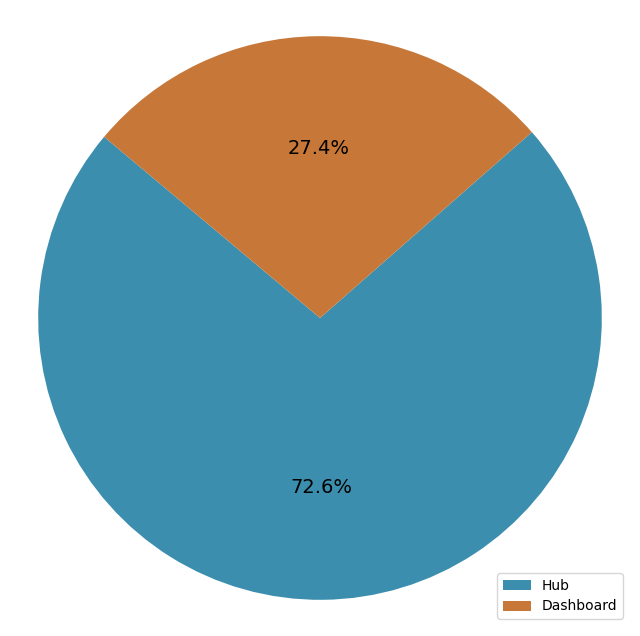

In [10]:
import logging
import matplotlib.pyplot as plt
from collections import Counter
import util.data_loader as data_loader
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive, VBox, HBox, Output, Label, Text

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Some constants
NUM_WEEKS = 4

# # device_type = data_loader.Device["PLUG"]
# device_type = None
# # unique_id = '13E56C4E1FD98745'  # Contact Sensor
# # unique_id = '39C0AE0A9852E5EE'  # Plug
# unique_id = None  # None

# Create a mapping dictionary for privacyState values
change_type_mapping = {
    data_loader.ChangeType["PRIVACY_STATE_HUB"]: 'Hub',
    data_loader.ChangeType["PRIVACY_STATE_PROXY"]: 'Dashboard',
}

# Create a color mapping dictionary for privacyState values
color_mapping = {
    'Hub': '#3c8eae',
    'Dashboard': '#c77838',
}

# Custom function to display the absolute count and percentage
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        return f'{pct:.1f}%'
    return my_autopct


output_data = []

for week in range(1, NUM_WEEKS + 1):
    data = data_loader.load_data(
        weeks=[week],
        device_types=None,
        unique_id=None,
        change_types=[data_loader.ChangeType["PRIVACY_STATE_HUB"], data_loader.ChangeType["PRIVACY_STATE_PROXY"]]
    )
    
    logger.info(f'Loaded {len(data)} records')
    
    # Extract privacyState values
    change_types = [change_type_mapping[item['changeType']] for item in data]
    
    # Count occurrences of each privacyState
    privacy_state_counts = Counter(change_types)
    
    # Calculate proportion of each privacyState and add to output_data
    
    total = sum(privacy_state_counts.values())
    
    for key, value in privacy_state_counts.items():
        output_data.append({
            'week': week,
            'privacy_state': key,
            'count': value,
            'proportion': value / total
        })
        
logger.info(f'Output data: {output_data}')

# Calculate the mean over the proportions
output_data_mean = {}
for item in output_data:
    if item['privacy_state'] not in output_data_mean:
        output_data_mean[item['privacy_state']] = 0
    output_data_mean[item['privacy_state']] += item['proportion']

for key in output_data_mean:
    output_data_mean[key] /= NUM_WEEKS
    
logger.info(f'Mean output data: {output_data_mean}')

# Create the pie chart with the output mean
labels = output_data_mean.keys()

# Prepare data for pie chart
sizes = [output_data_mean[label] for label in labels]

# Get the corresponding colors for each label
colors = [color_mapping[label] for label in labels]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add a legend
plt.legend(loc='lower right', labels=labels)

plt.savefig('output/state_change_location_all.pdf', format='pdf')

plt.show()